<a href="https://colab.research.google.com/github/AishlyManglani/Deep-Learning_-CMPE258/blob/main/neural%20networks/Numpy_3layer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
#numpy 3 layer
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [2]:
# Generate synthetic data using a 3-variable nonlinear equation
def generate_data(n=1000):
    x1 = np.random.uniform(-1, 1, n)
    x2 = np.random.uniform(-1, 1, n)
    x3 = np.random.uniform(-1, 1, n)
    y = np.sin(x1) + np.cos(x2) + x3**2  # Nonlinear function
    return np.vstack((x1, x2, x3)).T, y.reshape(-1, 1)

# Activation functions
def sigmoid(x):
    return 1 / (1 + np.exp(-x))

def sigmoid_derivative(x):
    return x * (1 - x)

def relu(x):
    return np.maximum(0, x)

def relu_derivative(x):
    return (x > 0).astype(float)


In [3]:
# Initialize parameters
def initialize_parameters(input_dim, hidden1, hidden2, output_dim):
    np.random.seed(42)
    W1 = np.random.randn(input_dim, hidden1) * 0.1
    b1 = np.zeros((1, hidden1))
    W2 = np.random.randn(hidden1, hidden2) * 0.1
    b2 = np.zeros((1, hidden2))
    W3 = np.random.randn(hidden2, output_dim) * 0.1
    b3 = np.zeros((1, output_dim))
    return W1, b1, W2, b2, W3, b3

# Forward pass
def forward_pass(X, W1, b1, W2, b2, W3, b3):
    Z1 = np.dot(X, W1) + b1
    A1 = relu(Z1)
    Z2 = np.dot(A1, W2) + b2
    A2 = relu(Z2)
    Z3 = np.dot(A2, W3) + b3
    A3 = Z3  # Linear output for regression
    return Z1, A1, Z2, A2, Z3, A3

# Compute loss (MSE)
def compute_loss(y_true, y_pred):
    return np.mean((y_true - y_pred) ** 2)

In [8]:
# Backpropagation
def backward_pass(X, y, Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, learning_rate):
    m = X.shape[0]
     # Compute gradients
    dA3 = 2 * (A3 - y) / m
    dZ3 = dA3 * (A3 * (1 - A3))  # Derivative of sigmoid
    dW3 = np.dot(A2.T, dZ3)
    db3 = np.sum(dZ3, axis=0, keepdims=True)

    dA2 = np.dot(dZ3, W3.T)
    dZ2 = dA2 * (A2 > 0)  # Derivative of ReLU
    dW2 = np.dot(A1.T, dZ2)
    db2 = np.sum(dZ2, axis=0, keepdims=True)

    dA1 = np.dot(dZ2, W2.T)
    dZ1 = dA1 * (A1 > 0)  # Derivative of ReLU
    dW1 = np.dot(X.T, dZ1)
    db1 = np.sum(dZ1, axis=0, keepdims=True)

    # Update weights and biases
    W1 -= learning_rate * dW1
    b1 -= learning_rate * db1  # FIXED: Ensure b1 is updated
    W2 -= learning_rate * dW2
    b2 -= learning_rate * db2  # FIXED: Ensure b2 is updated
    W3 -= learning_rate * dW3
    b3 -= learning_rate * db3  # FIXED: Ensure b3 is updated

    return W1, b1, W2, b2, W3, b3

In [10]:

# Train the model
def train(X, y, hidden1=10, hidden2=10, epochs=1000, learning_rate=0.01):
  input_dim = X.shape[1]
  output_dim = 1
  W1, b1, W2, b2, W3, b3 = initialize_parameters(input_dim, hidden1, hidden2, output_dim)
  losses = []

  for epoch in range(epochs):
    Z1, A1, Z2, A2, Z3, A3 = forward_pass(X, W1, b1, W2, b2, W3, b3)
    loss = compute_loss(y, A3)
    losses.append(loss)
    W1, b1, W2, b2, W3, b3 = backward_pass(X, y, Z1, A1, Z2, A2, Z3, A3, W1, b1, W2, b2, W3, b3, learning_rate)
    if epoch % 100 == 0:
        print(f"Epoch {epoch}, Loss: {loss:.4f}")

  return W1, b1, W2, b2, W3, b3, losses

# Generate data and train the model
X, y = generate_data()
W1, b1, W2, b2, W3, b3, losses = train(X, y)




Epoch 0, Loss: 1.7766
Epoch 100, Loss: 1.7513
Epoch 200, Loss: 1.5356
Epoch 300, Loss: 0.9234
Epoch 400, Loss: 0.5868
Epoch 500, Loss: 0.4886
Epoch 600, Loss: 0.4542
Epoch 700, Loss: 0.4390
Epoch 800, Loss: 0.4313
Epoch 900, Loss: 0.4271


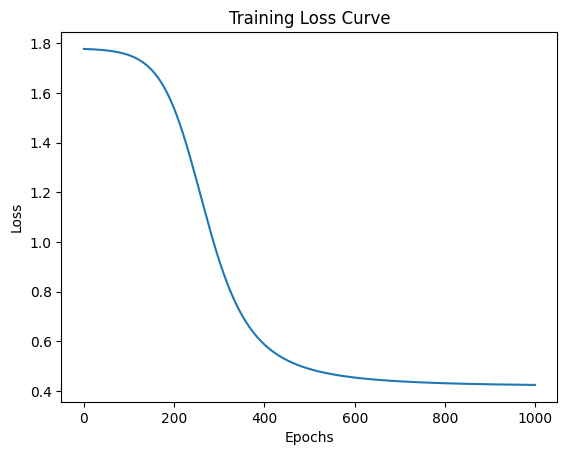

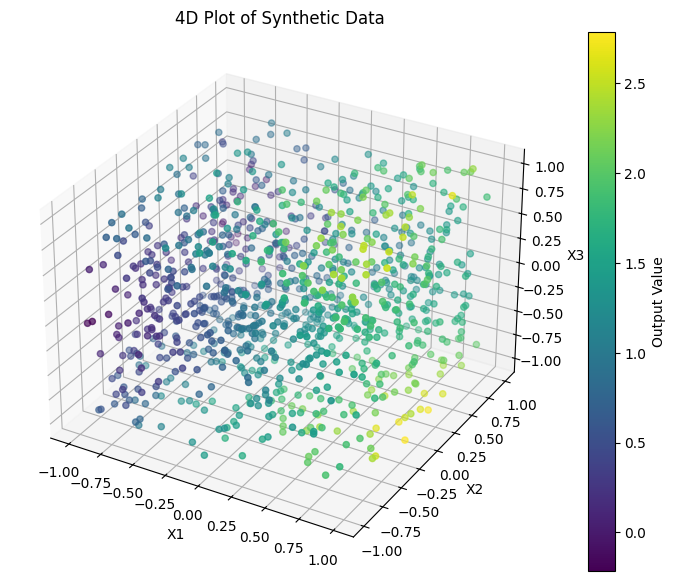

In [11]:
# Plot loss curve
plt.plot(losses)
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Training Loss Curve")
plt.show()

# 4D Plot
def plot_4d(X, y):
    fig = plt.figure(figsize=(10, 7))
    ax = fig.add_subplot(111, projection='3d')
    scatter = ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap='viridis')
    fig.colorbar(scatter, label='Output Value')
    ax.set_xlabel("X1")
    ax.set_ylabel("X2")
    ax.set_zlabel("X3")
    plt.title("4D Plot of Synthetic Data")
    plt.show()

plot_4d(X, y)